# **Project 3 Report**

Jayam Sutariya

CS458

## **P3-1. Revisit Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 
'talk.religion.misc', 'comp.graphics', 'sci.space']**

In [1]:
# Codes for P3-1(a)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
trainData = fetch_20newsgroups(subset = 'train', categories=categories)
testData = fetch_20newsgroups(subset = 'test', categories=categories)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

xTrain = vectors
yTrain = newsgroups_train.target
xTest = vectors_test
yTest = newsgroups_test.target

**(b) Build classifiers using multiple methods.**

In [53]:
# Codes for P3-1(b)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset = 'train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset = 'test', categories=categories)

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

xTrain = vectors
yTrain = newsgroups_train.target
xTest = vectors_test
yTest = newsgroups_test.target


lsvc = LinearSVC(verbose=0)
lsvc.fit(xTrain, yTrain)
ypred = lsvc.predict(xTest)
accuracy = accuracy_score(yTest, ypred)
print("Support Vector Machine accuracy:", accuracy)

mnb = MultinomialNB(alpha = 1.0e-10)
mnb.fit(xTrain, yTrain)
ypred = mnb.predict(xTest)
accuracy = accuracy_score(yTest, ypred)
print("Naive Bayes accuracy:", accuracy)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(xTrain, yTrain)
ypred = neigh.predict(xTest)
accuracy = accuracy_score(yTest, ypred)
print("K-nearest neigbors accuracy:", accuracy)

rfc = RandomForestClassifier(random_state=0, criterion='gini', max_depth=2)
rfc.fit(xTrain, yTrain)
ypred = mnb.predict(xTest)
accuracy = accuracy_score(yTest, ypred)
print("Random forest accuracy:", accuracy)

adbc = AdaBoostClassifier(n_estimators=35, random_state=0, learning_rate=0.9)
adbc.fit(xTrain, yTrain)
ypred = adbc.predict(xTest)
accuracy = accuracy_score(yTest, ypred)
print("Adaboost accuracy:", accuracy)

Support Vector Machine accuracy: 0.9524475524475524
Naive Bayes accuracy: 0.9258741258741259
K-nearest neigbors accuracy: 0.8783216783216783
Random forest accuracy: 0.9258741258741259
Adaboost accuracy: 0.7888111888111888


All the classifiers were trained on the same training data and were tested on the same testing data. Parameters were adjusted for each classifiers to achieve the highest classification accuracy. After adjusting and finding the optimum hyperparameters foe each classifier, the highest classification accuracy was outputted.

Support Vector Machine had the highest classification accuracy with that of about 95%. The classifier with the lowest classification accuracy was the Adaboost Classifier with a classification accuracy of 78.8%. Tried adjusting multiple hyperparameters, however, the given accuracy was the highest achievable. K-Nearest Neighbor also had a lower classification accuracy compared to the other classifiers, with an accuracy of 87.8%. This makes sense as K-nearest neighbor treats each attribute the same and is notorious for being a weak classifier. Random forest classifier and Naive Bayes classifier had identical classification accuracies. For Naive Bayes, there are not many hyperparameters that can be adjusted and the given accuracy was the highest achievable. Rnadom forest classifier accuracy did not change by much or at all when adjusting the hyperparameters.

In conclusion, based on the given training dataset and the testing dataset, the Support Vector Machine performed the best out of the 5 classifiers and Adaboost performed the worst.

# **P3-2. Recognizing hand-written digits**

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits.**

In [88]:
# Codes for P3-2(a)
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

**(b) Optimize the hyperparameters of your neural network to maximize the classification 
accuracy. Show the confusion matrix of your neural network. Discuss and compare your results 
with the results using a support vector classifier.**

Neural Network Accuracy: 0.9688542825361512


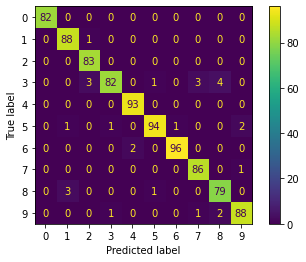

SVM Accuracy: 0.9866518353726362


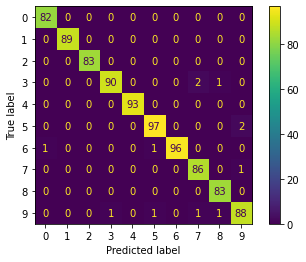

In [120]:
# Codes for P3-2(b)
from sklearn import datasets, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42)

clf1 = MLPClassifier(random_state=1, max_iter=300, activation='logistic', hidden_layer_sizes=(100,))
clf1.fit(X_train, y_train)
predicted = clf1.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predicted)
print("Neural Network Accuracy:", accuracy)
cm = metrics.confusion_matrix(y_test, predicted, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
disp.plot()
plt.show()


clf2 = svm.SVC(gamma=0.001)
clf2.fit(X_train, y_train)
predicted = clf2.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predicted)
print("SVM Accuracy:", accuracy)
cm = metrics.confusion_matrix(y_test, predicted, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
disp.plot()
plt.show()

As it can be clearly seen, both the models with ideal hyperparameters perform really well with the given training and testing dataset. The SVM accuracy is about 99% and the Neural Network accuracy is about 97% on average. They perform about the same in terms of classification accuracy. The confusion matrix for each classifier are mostly identical. Nonetheless, the SVM performs slightly better.

# **P3-3. Nonlinear Support Vector Machine**

**(a) Randomly generate the following 2-class data points.**

In [121]:
# Codes for P3-3(a)
import numpy as np 
np.random.seed(0) 
X = np.random.rand(300, 2)*10-5 
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0) 

**(b) Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC).**

In [122]:
# Codes for P3-3(b)
import numpy as np
from sklearn.svm import NuSVC

np.random.seed(0) 
X = np.random.rand(300, 2)*10-5 
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

clf = NuSVC()
clf.fit(X, Y)

NuSVC()

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the 
figure in the slide 131 in Chapter 4.**

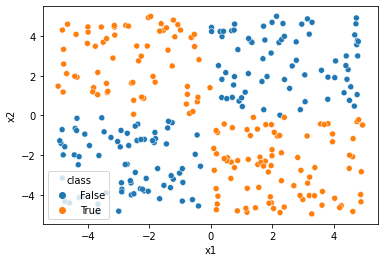

In [14]:
# Codes for P3-3(c)
import numpy as np
from sklearn.svm import NuSVC
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(0) 
X = np.random.rand(300, 2)*10-5
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

clf = NuSVC()
clf.fit(X, Y)

dataX = pd.DataFrame(X, columns=['x1', 'x2'])
dataY = pd.DataFrame(Y, columns=['class'])
frames = [dataX, dataY]
data = pd.concat(frames, axis=1)

ax = sns.scatterplot(x="x1", y="x2", hue='class', data=data)